# Text corpus creation and binary classification using DNN

## Suriya S (225229140)

###  1. Dataset Creation

In [1]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\online.CSCENTER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\online.CSCENTER\AppData\Roaming\nltk_data...


In [2]:
df=pd.read_csv("Quotes.csv",encoding='cp1252')

In [3]:
df.shape

(40, 2)

In [4]:
df.head()

,Sentence,Target
0,The purpose of our lives is to be happy.,0
1,Life is what happens when you're busy making o...,0
2,Get busy living or get busy dying.,0
3,"You only live once, but if you do it right, on...",0
4,"If you want to live a happy life, tie it to a ...",0


In [6]:
df.groupby('Target').count()

,Sentence
Target,
0,20
1,20


### 2. Pre-processing:

In [7]:
X=df.Sentence
y=df.Target

In [8]:
lemmatizer=WordNetLemmatizer()

In [10]:
def clean_review(review):

    tokens = review.lower().split()
    filtered_tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(filtered_tokens)

In [12]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\online.CSCENTER\AppData\Roaming\nltk_data...


True

In [13]:
temp=X.tolist()
fax=[]
for i in temp:
    fax.append(clean_review(i))
n_X=pd.Series(fax)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
tfidf = TfidfVectorizer()
vectors = tfidf.fit_transform(n_X)
features_name = tfidf.get_feature_names()
text_vect = pd.DataFrame(vectors.todense(),columns=features_name)
text_vect

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,absolutely,again,all,always,anyone,anything,apart,are,baby,best,...,watching,way,whole,work,worked,world,write,wrong,yesterday,you
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.340863,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.454792,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.347101


In [15]:
import tensorflow as tf
temp = tf.Variable(text_vect)

### 3. Dataset Preparation:

In [16]:
X_train,X_test,y_train,y_test=train_test_split(text_vect,y,train_size=0.75,test_size=0.25)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(30, 158)
(30,)
(10, 158)
(10,)


### 4. Model Creation:

### 5. Analysis

In [18]:
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import Dense,Activation

In [19]:
model = Sequential()
model.add(Dense(128, activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='sigmoid')) #output layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               20352     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 31,370
Trainable params: 31,370
Non-traina

In [20]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)

Epoch 1/100
2/2 - 0s - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6913 - val_accuracy: 0.5000 - 421ms/epoch - 211ms/step
Epoch 2/100
2/2 - 0s - loss: 0.6819 - accuracy: 0.5000 - val_loss: 0.6909 - val_accuracy: 0.5000 - 12ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 0.6745 - accuracy: 0.5000 - val_loss: 0.6896 - val_accuracy: 0.5000 - 15ms/epoch - 7ms/step
Epoch 4/100
2/2 - 0s - loss: 0.6651 - accuracy: 0.5000 - val_loss: 0.6875 - val_accuracy: 0.5000 - 14ms/epoch - 7ms/step
Epoch 5/100
2/2 - 0s - loss: 0.6564 - accuracy: 0.5000 - val_loss: 0.6852 - val_accuracy: 0.5000 - 14ms/epoch - 7ms/step
Epoch 6/100
2/2 - 0s - loss: 0.6472 - accuracy: 0.5000 - val_loss: 0.6827 - val_accuracy: 0.5000 - 14ms/epoch - 7ms/step
Epoch 7/100
2/2 - 0s - loss: 0.6362 - accuracy: 0.5000 - val_loss: 0.6803 - val_accuracy: 0.5000 - 15ms/epoch - 8ms/step
Epoch 8/100
2/2 - 0s - loss: 0.6240 - accuracy: 0.5417 - val_loss: 0.6776 - val_accuracy: 0.5000 - 14ms/epoch - 7ms/step
Epoch 9/100
2/2 - 0s - loss: 

In [21]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 11ms/step - loss: 1.0093 - accuracy: 0.5000


[1.00928795337677, 0.5]

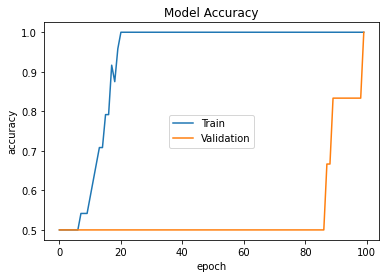

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### Model with three hidden layers

In [24]:
model2 = Sequential()
model2.add(Dense(512, activation='relu',input_dim=X_train.shape[1]))
model2.add(Dense(256, activation='relu'))

In [25]:
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(2, activation='sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               81408     
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 2)                 130       
                                                                 
Total params: 254,018
Trainable params: 254,018
Non-trainable params: 0
_________________________________________________________________


In [26]:
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model2.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)

Epoch 1/100
2/2 - 0s - loss: 0.6942 - accuracy: 0.4583 - val_loss: 0.6943 - val_accuracy: 0.3333 - 332ms/epoch - 166ms/step
Epoch 2/100
2/2 - 0s - loss: 0.6415 - accuracy: 0.9583 - val_loss: 0.6926 - val_accuracy: 0.3333 - 17ms/epoch - 8ms/step
Epoch 3/100
2/2 - 0s - loss: 0.5912 - accuracy: 1.0000 - val_loss: 0.6920 - val_accuracy: 0.5000 - 15ms/epoch - 8ms/step
Epoch 4/100
2/2 - 0s - loss: 0.5306 - accuracy: 1.0000 - val_loss: 0.6973 - val_accuracy: 0.5000 - 15ms/epoch - 7ms/step
Epoch 5/100
2/2 - 0s - loss: 0.4599 - accuracy: 1.0000 - val_loss: 0.7089 - val_accuracy: 0.5000 - 14ms/epoch - 7ms/step
Epoch 6/100
2/2 - 0s - loss: 0.3768 - accuracy: 1.0000 - val_loss: 0.7140 - val_accuracy: 0.5000 - 14ms/epoch - 7ms/step
Epoch 7/100
2/2 - 0s - loss: 0.2780 - accuracy: 1.0000 - val_loss: 0.7145 - val_accuracy: 0.5000 - 14ms/epoch - 7ms/step
Epoch 8/100
2/2 - 0s - loss: 0.1783 - accuracy: 1.0000 - val_loss: 0.7287 - val_accuracy: 0.5000 - 15ms/epoch - 8ms/step
Epoch 9/100
2/2 - 0s - loss: 

In [27]:
model2.evaluate(X_test,y_test)

1/1 [==============================] - 0s 11ms/step - loss: 1.0528 - accuracy: 0.6000


[1.0527589321136475, 0.6000000238418579]

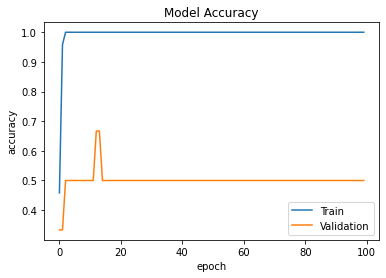

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### Model with two hidden layers

In [29]:
model3 = Sequential()
model3.add(Dense(1028, activation='relu',input_dim=X_train.shape[1]))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(2, activation='sigmoid')) #output layer
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1028)              163452    
                                                                 
 dense_12 (Dense)            (None, 512)               526848    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 2)                 514       
                                                                 
Total params: 822,142
Trainable params: 822,142
Non-trainable params: 0
_________________________________________________________________


In [30]:
model3.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model3.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)

Epoch 1/100
2/2 - 0s - loss: 0.7040 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000 - 319ms/epoch - 160ms/step
Epoch 2/100
2/2 - 0s - loss: 0.6133 - accuracy: 0.9167 - val_loss: 0.6811 - val_accuracy: 0.6667 - 17ms/epoch - 9ms/step
Epoch 3/100
2/2 - 0s - loss: 0.5307 - accuracy: 1.0000 - val_loss: 0.6637 - val_accuracy: 0.8333 - 18ms/epoch - 9ms/step
Epoch 4/100
2/2 - 0s - loss: 0.4201 - accuracy: 1.0000 - val_loss: 0.6357 - val_accuracy: 0.8333 - 19ms/epoch - 9ms/step
Epoch 5/100
2/2 - 0s - loss: 0.2817 - accuracy: 1.0000 - val_loss: 0.5924 - val_accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 6/100
2/2 - 0s - loss: 0.1495 - accuracy: 1.0000 - val_loss: 0.5396 - val_accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0558 - accuracy: 1.0000 - val_loss: 0.4927 - val_accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.4645 - val_accuracy: 0.6667 - 19ms/epoch - 9ms/step
Epoch 9/100
2/2 - 0s - loss: 

In [31]:
model3.evaluate(X_test,y_test)

1/1 [==============================] - 0s 10ms/step - loss: 1.1530 - accuracy: 0.4000


[1.1530239582061768, 0.4000000059604645]

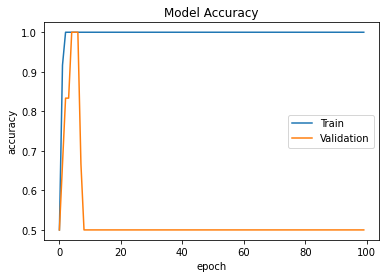

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### Model with one hidden layer

In [33]:
model4 = Sequential()
model4.add(Dense(64, activation='relu',input_dim=X_train.shape[1]))
model4.add(Dense(32, activation='relu'))
model4.add(Dense(2, activation='sigmoid')) #output layer
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                10176     
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 2)                 66        
                                                                 
Total params: 12,322
Trainable params: 12,322
Non-trainable params: 0
_________________________________________________________________


In [34]:
model4.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model4.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)

Epoch 1/100
2/2 - 0s - loss: 0.7007 - accuracy: 0.4583 - val_loss: 0.7135 - val_accuracy: 0.5000 - 284ms/epoch - 142ms/step
Epoch 2/100
2/2 - 0s - loss: 0.6878 - accuracy: 0.5417 - val_loss: 0.7120 - val_accuracy: 0.5000 - 12ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 0.6773 - accuracy: 0.6250 - val_loss: 0.7111 - val_accuracy: 0.3333 - 14ms/epoch - 7ms/step
Epoch 4/100
2/2 - 0s - loss: 0.6666 - accuracy: 0.7500 - val_loss: 0.7110 - val_accuracy: 0.3333 - 15ms/epoch - 7ms/step
Epoch 5/100
2/2 - 0s - loss: 0.6569 - accuracy: 0.8333 - val_loss: 0.7112 - val_accuracy: 0.3333 - 14ms/epoch - 7ms/step
Epoch 6/100
2/2 - 0s - loss: 0.6471 - accuracy: 0.8333 - val_loss: 0.7111 - val_accuracy: 0.3333 - 13ms/epoch - 6ms/step
Epoch 7/100
2/2 - 0s - loss: 0.6373 - accuracy: 0.8333 - val_loss: 0.7112 - val_accuracy: 0.3333 - 14ms/epoch - 7ms/step
Epoch 8/100
2/2 - 0s - loss: 0.6274 - accuracy: 0.8750 - val_loss: 0.7115 - val_accuracy: 0.3333 - 13ms/epoch - 7ms/step
Epoch 9/100
2/2 - 0s - loss: 

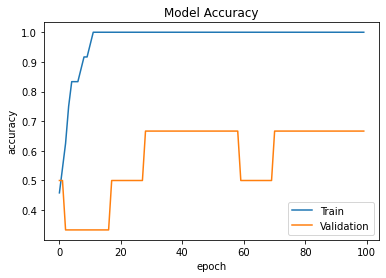

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()